In [17]:
import numpy as np
import scipy.io
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import fsolve
from scipy.optimize import leastsq
from scipy.signal import find_peaks
from scipy.integrate import solve_ivp
from scipy import signal
import scipy as sp

import warnings
warnings.filterwarnings('ignore')

# Plots setup 
from matplotlib import rc

rc('text', usetex=False)
plt.rcParams['text.latex.preamble'] = [
    r'\usepackage{tgheros}',    # helvetica font
    r'\usepackage{sansmath}',   # math-font matching  helvetica
    r'\sansmath'                # actually tell tex to use it!
    r'\usepackage{siunitx}',    # micro symbols
    r'\sisetup{detect-all}',    # force siunitx to use the fonts
]  
plt.rcParams.update({"font.size": 18})
plw = 0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

# Thermodynamics and kinetics of CaCO3 Liquid/Liquid phase separation in confined volumes.

Aaron Finney and Matteo Salvalaglio

_Last updated 27/09/2022_

## Chemical Potential of CaCO$_3$ and solvent in the dilute and dense phases
Let's consider two liquid phases, $\ell$ diluited in the solute (CaCO$_3$), and $L$ dense in the solute specie. The chemical potential of the solute in the dilute phase, can be written as: 
\begin{equation}
\mu^{\ell}=\mu_0+kT\ln{a_i^\ell}\approx{\mu_0+kT\ln{x^\ell}}
\end{equation}
where $\mu_0$ is a reference chemical potential and ${a_i^\ell}$ is the activity of the solute in the dilute phase, and $x^\ell$ is its molar fraction. Analogously, the chemical potential of the solute in the dense phase $L$ in equilibrium with $\ell$ at temperature T and pressure P can be written as: 
\begin{equation}
\mu^{L}=\mu_0+RT\ln{a^{\ell,*}}\approx{\mu_0+kT\ln{x^\ell,*}}
\end{equation}
where $a^{\ell,*}$ is the activity of the solute in a dilute phase $\ell$ in equilibrium ($*$) with the dense phase, and $x^\ell,*$ the molar fraction in the same conditions. 
If the system is a binary solution the solvent chemical potential in the dilute and dense phases can be written in an analogous manner: 
\begin{equation}
\mu_s^{\ell}\approx{\mu_0+kT\ln{1-x^\ell}}
\end{equation}
and 
\begin{equation}
\mu_i^{L}=\mu_0+RT\ln{a_i^{\ell,*}}\approx{\mu_0+kT\ln{x^\ell,*}}
\end{equation}
## Molar fraction in the dilute phase
When the dense and dilute phase coexist a confined volume, unable to exchange with an external reservoir, the molar fraction $x$ becomes a function of the number of molecules in the dense phase. In the case of a multicomponent system, where both the dilute $\ell$ and dense phase $L$ contain both solute and solvent the molar fraction x can be written as: 
\begin{equation}
x\frac{n_{tot}-n_L}{n_{tot}+n^s_{tot}-n_L-n^s_{tot}}
\end{equation}
where $n_{tot}$ is the total number of solute molecules, $n_L$ the number of solute molecules in the dense phase, $n^s_{tot}$ the total number of solvent molecules, and $n^s_{L}
$ the number of solvent molecules in the dense phase. 
By considering the level of solvation constant with the size of the dense phase droplet a solvent/solute ratio $\phi$ can be itroduced, leading to the following expression for the solute molar fraction in the diluite phase: 
\begin{equation}
x\frac{n_{tot}-n_L}{n_{tot}+n^s_{tot}-(1+\phi)n_L}
\end{equation}
## Free Energy of a simulation box: 
The Free energy of a simulation box containing $n_{tot}$ solute molecules and $n^s_{tot}$ solvent molecules, of which n_L in the dense liquid phase can thus be written as: 
\begin{equation}
F(n_L)=n_{tot}\mu^\ell-n_L(\mu^\ell-\mu^L)+n_{tot}^s\mu_s^\ell-n_L\phi(\mu_s^\ell-\mu_s^L)
\end{equation}
The free energy of the same simulation box in absence of a droplet is instead: 
\begin{equation}
F(n_L=0)=n_{tot}\mu_0^\ell+n_{tot}^s\mu_{s,0}^\ell
\end{equation}
As such the $\Delta{F}$ of formation of a droplet from an initial homogeneous solution is: 
\begin{equation}
\Delta{F}(n_L)=n_{tot}(\mu^\ell-\mu_0^\ell)+n_{tot}^s(\mu_s^\ell-\mu_{s,0}^\ell)-n_L\left[(\mu^\ell-\mu^L)+\phi(\mu_s^\ell-\mu_s^L)\right]
\end{equation}

Introducing now the definitions of chemical potential and molar fraction of solute, we obtain: 
\begin{equation}
\beta\Delta{F}(n_L)=n_{tot}\ln\frac{x}{x_0}+n_{tot}^s\ln\frac{1-x}{1-x_0}-n_L\left(\ln\frac{x}{x^*}+\phi\ln\frac{1-x}{1-x^*}\right)
\end{equation}



## Steady state droplet conditions

The local minimum of the reversible work of droplet formation identifies the steady state, equilibrium condition for a droplet of dense phase $L$, that nucleates and grows from a dilute phase of volume $V_{tot}$ and initial number of solute molecules $n_{tot}$. This condition corresponds to a stationary point in the $\Delta{F(n_L)}$ curve, where $\frac{d\Delta{F}}{dn_L}=0$ and the mean thermodynamic force acting on the dense phase droplet is null. 
The thermodynamic force driving the droplet evolution is 
\begin{equation}
\frac{d\beta\Delta{F}}{d{n_L}}=\frac{\phi{n_{tot}}-n^s_{tot}}{(n_{tot}+n^s_{tot}-(1+\phi)n_L)^2}\left[\frac{n_{tot}}{x}+\frac{n^s_{tot}}{x-1}\right] - \ln{\frac{x}{x^*}}- \phi\ln{\frac{1-x}{1-x^*}}-\frac{n_L(n_{tot}\phi-n^s_{tot})}{n_{tot}+n^s_{tot}-(1+\phi)n_L}\left(\frac{1}{n_{tot}-n_L}-\frac{\phi}{n^s_{tot}-\phi{n_L}}\right)
\end{equation}
### Fig.1 Reversibe work of droplet formation and Mean Thermodynamic Force

In [89]:
#Define Functions -> Free Energy

X=lambda nL, ntot, phi, nstot,: (ntot-nL)/(ntot+nstot-(1+phi)*nL)

Nltot=lambda nL, ntot, phi, nstot,: (ntot+nstot-(1+phi)*nL)

#F=lambda nL, ntot, phi, nstot, xstar, betasigmaprime, : \
#                                -nL*(np.log(X(nL,ntot,phi,nstot)/xstar)) \
#                                +phi*np.log((1-X(nL,ntot,phi,nstot))/(1-xstar))\
#                                +ntot*np.log(X(nL,ntot,phi,nstot)/X(0,ntot,phi,nstot)) \
#                                +nstot*np.log((1-X(nL,ntot,phi,nstot))/(1-X(0,ntot,phi,nstot))) \
#                                +betasigmaprime*np.power((nL*(1+phi)),2/3)

F=lambda nL, ntot, phi, nstot, xstar, betasigmaprime, : \
                                -nL*(np.log(X(nL,ntot,phi,nstot)/xstar)) \
                                -nL*phi*np.log((1-X(nL,ntot,phi,nstot))/(1-xstar))\
                                +ntot*np.log(X(nL,ntot,phi,nstot)/X(0,ntot,phi,nstot)) \
                                +nstot*np.log((1-X(nL,ntot,phi,nstot))/(1-X(0,ntot,phi,nstot))) \
                                +betasigmaprime*np.power((nL*(1+phi)),2/3)

#dFdnL=lambda nL, ntot, phi, nstot, xstar, betasigmaprime, : \
#                                            (phi*ntot-nstot)/np.power(Nltot(nL,ntot,phi,nstot),2)*(ntot/X(nL,ntot,phi,nstot)+nstot/(X(nL,ntot,phi,nstot)-1)) \
#                                            -np.log(X(nL,ntot,phi,nstot)/xstar)-phi*np.log((1-X(nL,ntot,phi,nstot)/(1-xstar))) \
#                                            -nL*(ntot*phi-nstot)/Nltot(nL,ntot,phi,nstot)*(1/(ntot-nL)-phi/(nstot-phi*nL)) \
#                                            +2/3*betasigmaprime*np.power((1+phi),2/3)*np.power((nL*(1+phi)),-1/3)

dFdnL=lambda nL, ntot, phi, nstot, xstar, betasigmaprime, : \
                                            (phi*ntot-nstot)/np.power(Nltot(nL,ntot,phi,nstot),2)*(ntot/X(nL,ntot,phi,nstot)+nstot/(X(nL,ntot,phi,nstot)-1)) \
                                            -np.log(X(nL,ntot,phi,nstot)/xstar)-phi*np.log((1-X(nL,ntot,phi,nstot)/(1-xstar))) \
                                            -nL*(ntot*phi-nstot)/Nltot(nL,ntot,phi,nstot)*(1/(ntot-nL)-phi/(nstot-phi*nL)) \
                                            +(2*betasigmaprime*np.power((1+phi)*nL,2/3)) / (3*nL)



26.08695652173913
26.08361204013378
217.7257525083612
217.72240802675586


array([       nan, 4.30223305, 2.94437066, 2.28548698, 1.87027968,
       1.5754289 , 1.35100486, 1.17223412, 1.02517308, 0.90126301,
       0.79490588, 0.70225756, 0.62057455, 0.54783662, 0.48251701,
       0.42343644, 0.36966681, 0.32046587, 0.27523152, 0.2334693 ,
       0.19476863, 0.15878519, 0.12522769, 0.09384772, 0.06443187,
       0.03679561, 0.01077839, 0.01376025, 0.03694383, 0.05888149,
       0.07967008, 0.09939593, 0.11813624, 0.13596035, 0.1529307 ,
       0.16910372, 0.18453056, 0.1992577 , 0.2133275 , 0.22677865,
       0.23964658, 0.25196381, 0.26376026, 0.27506346, 0.28589888,
       0.29629004, 0.30625876, 0.31582526, 0.32500836, 0.33382559,
       0.34229326, 0.35042662, 0.35823993, 0.36574653, 0.37295891,
       0.37988881, 0.38654724, 0.39294457, 0.39909054, 0.40499435,
       0.41066465, 0.41610964, 0.42133702, 0.42635412, 0.43116785,
       0.43578475, 0.44021103, 0.44445258, 0.44851498, 0.45240355,
       0.45612331, 0.45967908, 0.46307541, 0.46631664, 0.46940

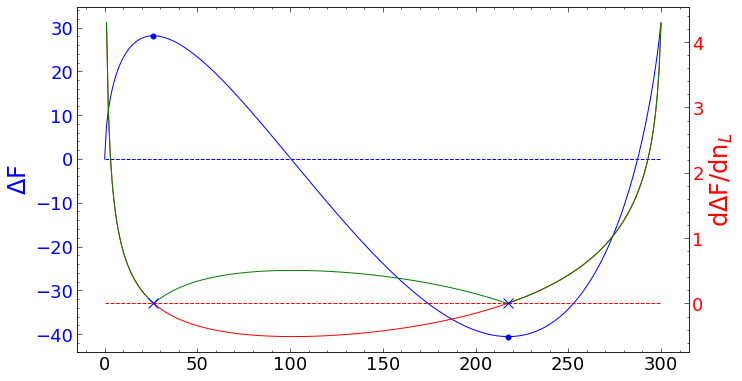

In [101]:
# I am using order of magnitude values from illustrative purposes. 
nm=300
nm2=np.int(nm/2)
nL=np.linspace(0,nm,nm)
#ntot=501 #g/l
#phi=0
#nstot=6000
#xstar=0.01
#betasigmaprime=10# 
ntot=301 #g/l
phi=5
nstot=30000
xstar=0.00095
betasigmaprime=3# 

#figure
figure=plt.figure()
ax2 = figure.add_axes([0.1,0.1,1.7,1.2])
ax2.tick_params(axis ='y', labelcolor = 'blue')
ax2.set_ylabel('$\Delta$F', fontsize=24, color='blue');

#Free Energy
plt.plot(nL,F(nL,ntot,phi,nstot,xstar,betasigmaprime),'b',linewidth=1)
plt.show
plt.plot(nL,np.zeros(np.shape(nL)),'b--',linewidth=1)

ax1 = ax2.twinx() 
ax1.set_ylabel('d$\Delta$F/dn$_L$', fontsize=24, color='red')
ax1.plot(nL,np.zeros(np.shape(nL)),'r--',linewidth=1)
#Mean Force
ax1.plot(nL,(dFdnL(nL,ntot,phi,nstot,xstar,betasigmaprime)),'r',linewidth=1)
ax1.plot(nL,np.abs((dFdnL(nL,ntot,phi,nstot,xstar,betasigmaprime))),'g',linewidth=1)


Ftot=F(nL,ntot,phi,nstot,xstar,betasigmaprime);
ax2.plot(nL[np.argmax(Ftot[0:np.argmin(Ftot)])],np.max(Ftot[0:np.argmin(Ftot)]),'ob',markersize=5)
ax2.plot(nL[np.argmin(Ftot)],np.min(Ftot),'ob',markersize=5)
ax1.plot(nL[np.argmin(Ftot)],0,'xb',markersize=10)
ax1.plot(nL[np.argmax(Ftot[0:np.argmin(Ftot)])],0,'xb',markersize=10)
ax1.tick_params(axis ='y', labelcolor = 'red', right = True , labelright = True ) 

dFdnltot = np.abs(dFdnL(nL,ntot,phi,nstot,xstar,betasigmaprime))
plt.savefig('FES_and_dFdnL', dpi=600, bbox_inches='tight')

print(nL[np.argmax(Ftot[:nm2])])
print(nL[np.argmin(dFdnltot[1:nm2])]+1)
print(nL[np.argmin(Ftot)])
print(nL[nm2+np.argmin(dFdnltot[nm2:])]+1)

dFdnltot[:nm2]

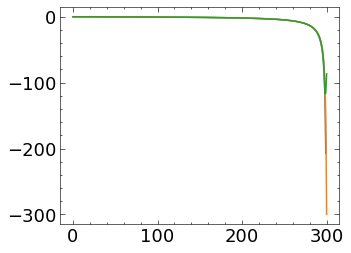

In [94]:
ntot=301 #g/l
nstot=30000
xstar=0.00095
betasigmaprime=3# 
phi=5
dx = nL[1]-nL[0]


f1 = ntot*np.log(X(nL,ntot,phi,nstot)/X(0,ntot,phi,nstot)) + nstot*np.log((1-X(nL,ntot,phi,nstot))/(1-X(0,ntot,phi,nstot)))
d1 = (phi*ntot-nstot)/np.power(Nltot(nL,ntot,phi,nstot),2)*(ntot/X(nL,ntot,phi,nstot)+nstot/(X(nL,ntot,phi,nstot)-1)) 
dn1 = signal.savgol_filter(f1, window_length=5, polyorder=1, mode="nearest", deriv=1)
dn1f = np.diff(f1)/dx
nLd = nL[:-1:] 

#plt.plot(nL[:-10],d1[:-10]-dn1[:-10])
plt.plot(nL[:-1],dn1f)
plt.plot(nL[:],d1[:])
plt.plot(nL[:],dn1[:])
#plt.xlim([0,50])
#plt.ylim([-0.1,0.1])
#plt.plot(nL,dn1)
#-np.log(X(nL,ntot,phi,nstot)/xstar)-phi*np.log((1-X(nL,ntot,phi,nstot)/(1-xstar))) 
#-nL*(ntot*phi-nstot)/Nltot(nL,ntot,phi,nstot)*(1/(ntot-nL)-phi/(nstot-phi*nL)) 
#2/3*betasigmaprime*np.power((1+phi),2/3)*np.power((nL*(1+phi)),-1/3)

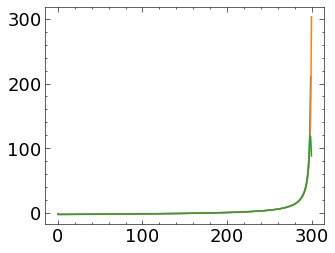

In [92]:

f2 =-nL*(np.log(X(nL,ntot,phi,nstot)/xstar))-nL*phi*np.log((1-X(nL,ntot,phi,nstot))/(1-xstar))
d2 = -np.log(X(nL,ntot,phi,nstot)/xstar)-phi*np.log((1-X(nL,ntot,phi,nstot)/(1-xstar))) -nL*(ntot*phi-nstot)/Nltot(nL,ntot,phi,nstot)*(1/(ntot-nL)-phi/(nstot-phi*nL))
dn2 = signal.savgol_filter(f2, window_length=5, polyorder=1, mode="nearest", deriv=1)
dn2f = np.diff(f2)/dx

plt.plot(nL[:-1],dn2f)
plt.plot(nL[:],d2[:])
plt.plot(nL[:],dn2[:])
#plt.xlim([0,50])
#plt.ylim([-10,0])

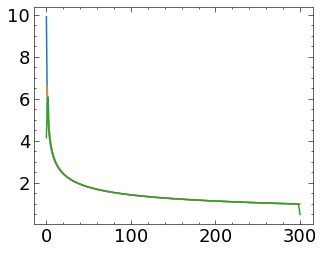

In [85]:
f3 = betasigmaprime*np.power((nL*(1+phi)),2/3)
#d3 = 2/3*betasigmaprime*np.power((1+phi),2/3)*np.power((nL*(1+phi)),-1/3)
d3 = (2*betasigmaprime*np.power((1+phi)*nL,2/3)) / (3*nL)
dn3 = signal.savgol_filter(f3, window_length=5, polyorder=1, mode="nearest", deriv=1)
dn3f = np.diff(f3)/dx

plt.plot(nL[:-1],dn3f)
plt.plot(nL[:],d3[:])
plt.plot(nL[:],dn3[:])
#plt.xlim([0,50])
#plt.ylim([-10,0])

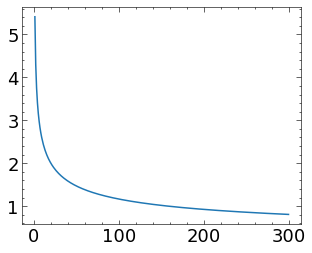

In [7]:
phi=0.0001
d1 = 2/3*betasigmaprime*np.power((1+phi),2/3)*np.power((nL*(1+phi)),-1/3)
phi=50
d2 = 2/3*betasigmaprime*np.power((1+phi),2/3)*np.power((nL*(1+phi)),-1/3)

plt.plot(nL,d2-d1)

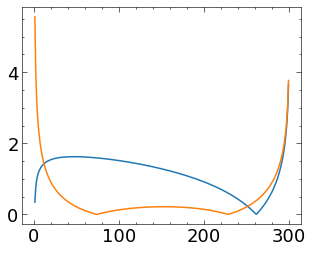

In [8]:
f1 = np.abs(a1+b1+c1+d1)
f2 = np.abs(a2+b2+c2+d2)

plt.plot(nL,f1)
plt.plot(nL,f2)

In [9]:
# Redefine dFdnL for optimization
# Error function -> corresponds to dFdnL as we want to compute its zero
# tpl: tuple of fitted parameters, 
# tpl[0]: xstar
# tpl[1]: betasigmaprime
#tpl = [xstar,betasigmaprime]

ERR=lambda tpl, nL, ntot, phi, nstot, : \
                                    (phi*ntot-nstot)/np.power(Nltot(nL,ntot,phi,nstot),2)*(ntot/X(nL,ntot,phi,nstot)+nstot/(X(nL,ntot,phi,nstot)-1)) \
                                    -np.log(X(nL,ntot,phi,nstot)/tpl[0])-phi*np.log((1-X(nL,ntot,phi,nstot)/(1-tpl[0]))) \
                                    -nL*(ntot*phi-nstot)/Nltot(nL,ntot,phi,nstot)*(1/(ntot-nL)-phi/(nstot-phi*nL)) \
                                    +2/3*tpl[1]*np.power((1+phi),2/3)*np.power((nL*(1+phi)),-1/3)

# I have left here a random set of parameters, here you should introduce one line per simulation to define SIMS_data
# Simulation data:  ntot nstot phi nl_steadystate
'''
SIMS_data=np.array([(100,40000,8.2,22.4),         #100b014
                    (100,30000,5.4,79),           #100b018
                    (100,20000,5.4,81),           #100b028
                    (100,10000,5.8,92),           #100b055 
                    (100,8000,5.5,90.7),          #100b069
                    (100,6000,4.7,92.2),          #100b092
                    (150,15000,5.9,133.1),        #150b055 
                    (200,20000,5.8,189.2),        #200b055
                    (250,25000,6.3,225.4),        #250b055
                    (300,30000,8.7,270.8),        #300b055
                    (50,5000,5.2,45.3),           #50b055
                   ])
'''

SIMS_data=np.array([(100,30000,5.4,79),           #100b018
                    (100,20000,5.4,81),           #100b028
                    (100,10000,5.8,92),           #100b055 
                    (100,8000,5.5,90.7),          #100b069
                    (100,6000,4.7,92.2),          #100b092
                    (150,15000,5.9,133.1),        #150b055 
                    (200,20000,5.8,189.2),        #200b055
                    (250,25000,6.3,225.4),        #250b055
                    (300,30000,6.1,270.8),        #300b055 - smaller cutoff
                    (50,5000,5.2,45.3),           #50b055
                   ])


Nsimulations=np.shape(SIMS_data)[0]  

In [10]:
REPS=10 #number of bootstrap samples 
CEQ=np.zeros(REPS)
SIGMA=np.zeros(REPS)

#Bootstrapping-like error calculation with random selection of N experiments with repetition
for REP in np.arange(0,REPS):
    #Randomise Initial Guess
    guess=[0.1,1]
    #choose Nsimulations random simulations (with repetition)
    simulations=np.random.randint(0,Nsimulations,Nsimulations)  
    
    ERRargs = (SIMS_data[simulations,3],SIMS_data[simulations,0],SIMS_data[simulations,2],SIMS_data[simulations,1])

    #least squares fitting
    #tplFitted => tuple of fitted parameters
    tplFitted,success=leastsq(ERR,guess,args=ERRargs,full_output=0,maxfev=1000,ftol=1E-15,gtol=1E-15)

    CEQ[REP]=tplFitted[0]
    SIGMA[REP]=tplFitted[1]
                              



In [11]:
print(np.mean(CEQ),np.std(CEQ)/np.sqrt(10))
print(np.mean(SIGMA),np.std(SIGMA)/np.sqrt(10))

0.0015108426593827043 0.0002952247264014963
-1.1488289297331247 0.5419527717409859
